In [1]:
import matplotlib as mplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def compute_distances_single_row(row, number):
    row_values = row.astype(int)                # Convert the row values to integers
    indices = np.where(row_values == number)[0] # Find the indices where the number occurs in the row
    distances = np.diff(indices)                # Compute the distances between consecutive occurrences
    return distances.tolist()


def compute_all_distances(log_dict):                    # compute distances for all runs
    
    gap_dict={}
    dev_dict={}
    thread_configs=list(log_dict)

    for config in thread_configs:
        gaps = []
        data_df = log_dict[config]
        meta_data = [int(s) for s in config.split() if s.isdigit()]
        n_threads = meta_data[0]
        outer_iter = meta_data[1]
        inner_iter = meta_data[2]

        fair_case = inner_iter / n_threads          # fairest scenario: (#inner_iterations / #threads) lock acquisitions per thread
        deviations = []                             # deviation from fairest scenario per outer iteration
        
        for run in range(outer_iter):
            # print("run:", run)
            for thread_id in range(n_threads):
                print("tid:", thread_id, compute_distances_single_row(data_df.iloc[run], thread_id))
                distances = compute_distances_single_row(data_df.iloc[run], thread_id)
                gaps = gaps + distances
                deviations.append(abs(fair_case - len(distances)))
        
        dev_dict[config]=deviations
        gap_dict[config]=gaps
    return dev_dict, gap_dict
            

def compute_max_min_distances(df, n_threads):   # do we need this?
    min_distances = []
    max_distances = []

    for index, row in df.iterrows(): #loop through all outer loops
        row_values = row.astype(int)
        
        min_dist = np.nan                               # Initialize min/max dist
        max_dist = np.nan                               # Initialize min/max dist
        
        for num in range(n_threads):                    # iterate thorufh all threads
            indices = np.where(row_values == num)[0]    # Find the indices where the number occurs in the row
            if len(indices) >= 2:                       # Compute the distances between consecutive occurrences and update min/max dist
                distances = np.diff(indices)    
                min_dist = np.nanmin(distances) if np.isnan(min_dist) else min(min_dist, np.nanmin(distances))
                max_dist = np.nanmax(distances) if np.isnan(max_dist) else max(max_dist, np.nanmax(distances))
        
        min_distances.append(min_dist)                  # Append min/max dist to the respective lists
        max_distances.append(max_dist)

    df['min_gap'] = min_distances                       # Add min/max dist as new columns in the DataFrame
    df['max_gap'] = max_distances
    return df


In [2]:
# LOAD FAIRNESS DATA FROM DIFFERENT LOCKS

'''
fairness_flock_N_oiter_iter.txt            lock-filter with N threads, oiter outer iterations, iiter inner iterations
fairness_bwoo_N....txt                     block-woo
fairness_binary_N....txt                   torunament-tree
fairness_alag_N....txt                     alagarsamy
'''

# data_src= ['fairness_flock_X.txt', 'fairness_bwoo_X.txt','fairness_binary_X.txt','fairness_alag_X.txt']
data_src= ['fairness_test.txt']
fairness_dict= {}

for src in data_src:
    lock_dict={}
    data=[]
    with open(src, 'r') as file:
        lines = file.readlines()[2:]

        for line in lines:
            values = line.split()
            data.append(values)
        
        data = pd.DataFrame(data)
        fairness_dict[src.removesuffix('.txt') ]=lock_dict

SyntaxError: EOL while scanning string literal (1623120811.py, line 3)

In [ ]:
# EXAMPLE COMPUTE_DISTANCES
test_df= fairness_dict["fairness_test"]

iter_id = 0                                    # Specify the row index you want to compute distances for
th_id = 3                                      # Specify the number ID you want to compute distances for

row = test_df.iloc[iter_id]                    # Get the row based on the index
distances = compute_distances_single_row(row, th_id)      # Compute the distances for the given number in the row

print(f"Distances for number {th_id} in row {iter_id}:")
print(distances)

Distances for number 3 in row 0:
[6, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]


In [ ]:
# EXAMPLE COMPUTE_DISTANCES FOR ALL DATA
dev_dict, gap_dict = compute_all_distances(fairness_dict)
dev_keys=list(dev_dict)
gap_keys=list(gap_dict)

for key in dev_keys:
    devs= dev_dict[key]
    plt.boxplot(devs)

run: 0
tid: 0 [1]
tid: 1 [6, 7, 19, 7, 7, 7, 7, 7, 7, 7, 7, 3]
tid: 2 [6, 6, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]
tid: 3 [6, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]
tid: 4 [6, 6, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]
tid: 5 [15, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]
tid: 6 [6, 6, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]
tid: 7 [6, 6, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7]
run: 1
tid: 0 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2]
tid: 1 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
tid: 2 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
tid: 3 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
tid: 4 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
tid: 5 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
tid: 6 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
tid: 7 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
run: 2
tid: 0 [8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 8, 2]
tid: 1 [8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 8]
tid: 2 [8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 8, 2]
tid: 3 [8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7]
tid: 4 [8, 8, 8, 8, 8, 8, 8, 8, 28]
tid: 5 [8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7]
tid: 6 [8, 8, 8, 8, 8, 8, 8, 8, 7, 

(array([  1.,   6.,   4.,   1.,  23.,  74., 123., 684.,   2.,   0.,   1.,
          1.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
        66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
        79.]),
 <BarContaine

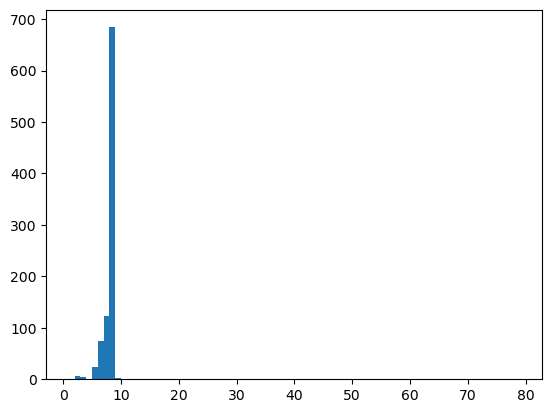

In [ ]:
for key in gap_keys:
    gaps= dev_dict[key]
    plt.hist(gaps, bins=range(min(gaps), max(gaps)+2))